In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

### 타이타닉 데이터를 활용한 탑승자의 생사여부 예측

In [4]:
train_df <- read.csv("./Data/Titanic_train.csv")
head(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [5]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [6]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


# 컬럼 내용 확인
- survived : 생존여부 ,0=dead,1=alive
- pclass : 티켓등급
- sibSp : 함께 탑승한 형제, 자매, 배우자의 수
- parch : 함께 탑승한 부모 자식의 수
- fare : 운임
- cabin : 객실번호
- Embarked : 탑승 항구, S=사우스햄튼(영국), C=잘츠부르크(오스트리아),Q=퀸스타운(영국)

In [8]:
colSums(is.na(train_df)) #결측치 확인

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [9]:
177/891

[1] 0.1986532

In [11]:
subset(train_df,!is.na(train_df$Age))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


In [13]:
# Survived 기준으로 dataset정렬
library(dplyr)
head(arrange(train_df,desc(train_df$Survived)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
5,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
6,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


In [14]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [24]:
#survived의 생존과 사망의 비율 검토
nrow(subset(train_df,train_df$Survived==0))
nrow(subset(train_df,train_df$Survived==1))
nrow(subset(train_df,train_df$Survived==0)) /nrow(train_df) *100 # 사망자
nrow(subset(train_df,train_df$Survived==1)) /nrow(train_df) *100 # 생존자

table(train_df$Survived)

[1] 549

[1] 342

[1] 61.61616

[1] 38.38384


  0   1 
549 342 

In [57]:
a <- nrow(train_df[train_df$Survived==0,])/nrow(train_df)*100
b <- nrow(train_df[train_df$Survived==1,])/nrow(train_df) *100
c <- nrow(train_df[train_df$Survived==0,])
d <- nrow(train_df[train_df$Survived==1,])
df <- data.frame(Category = c("사망", "생존"),
                 Count = c(c, d))
df

Category,Count
<chr>,<int>
사망,549
생존,342


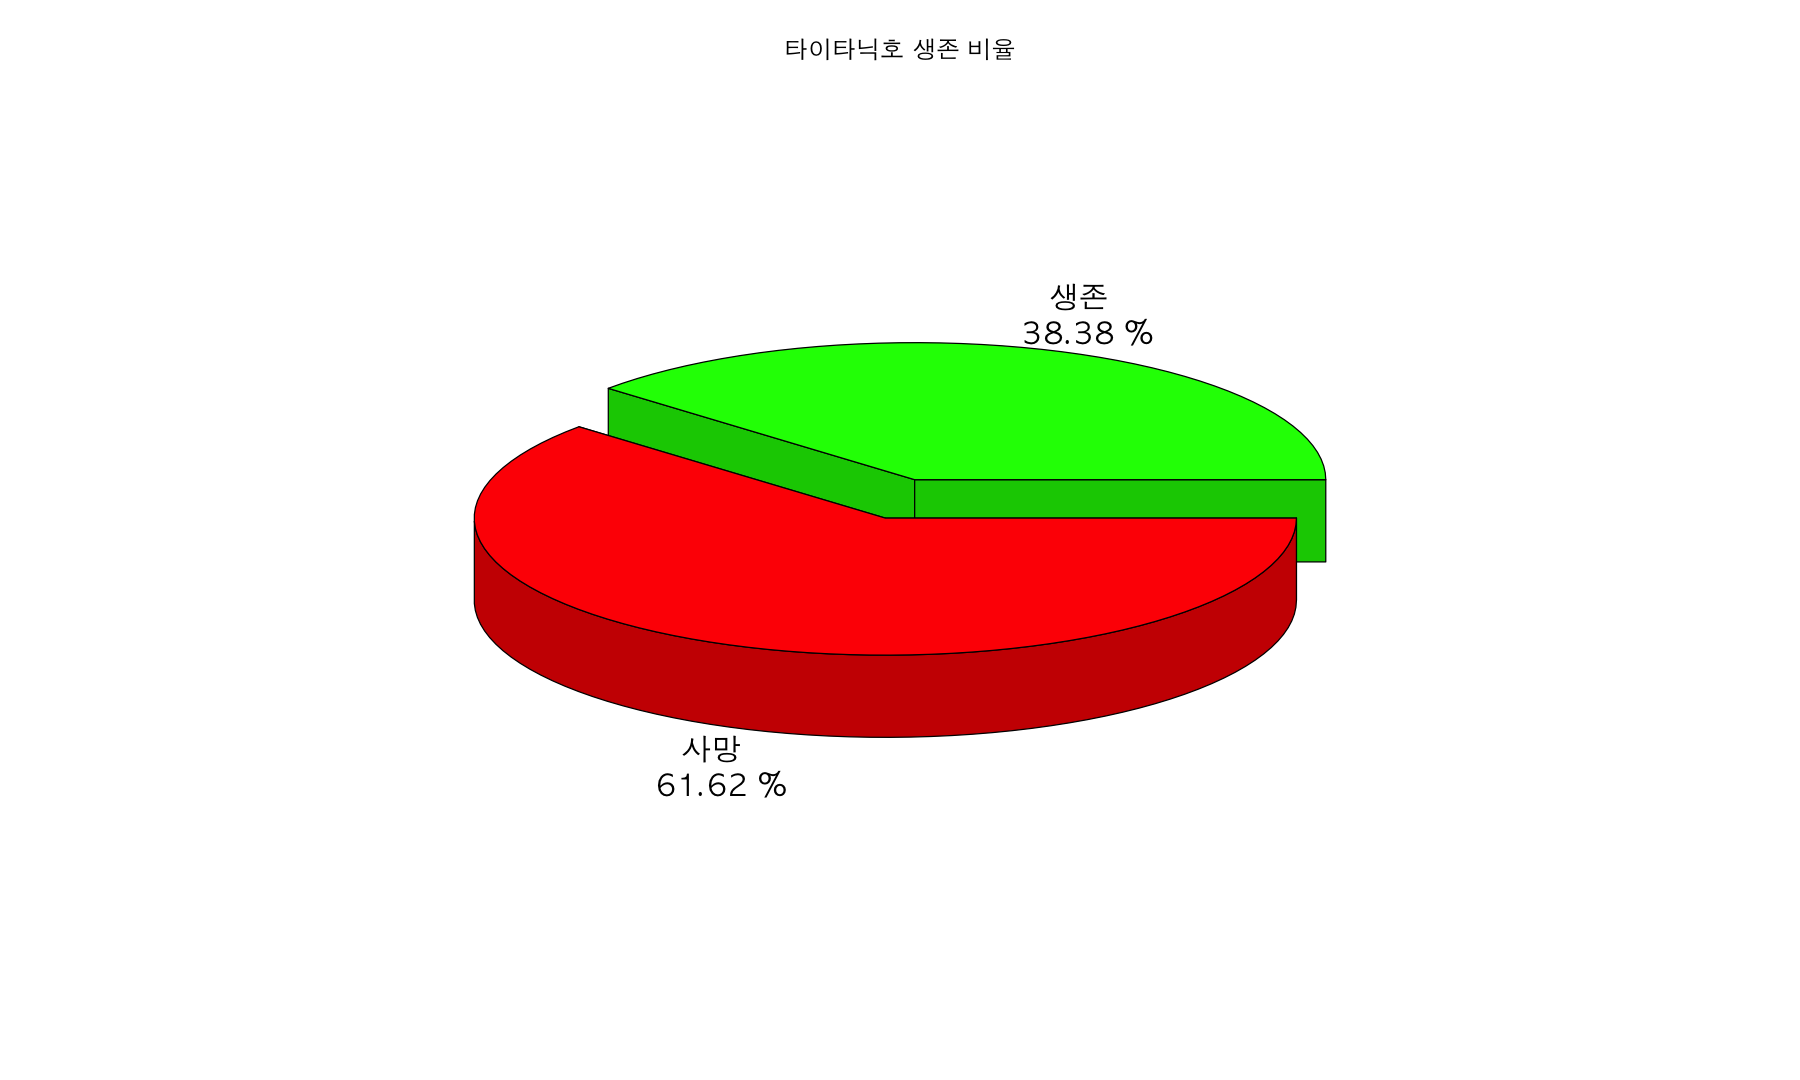

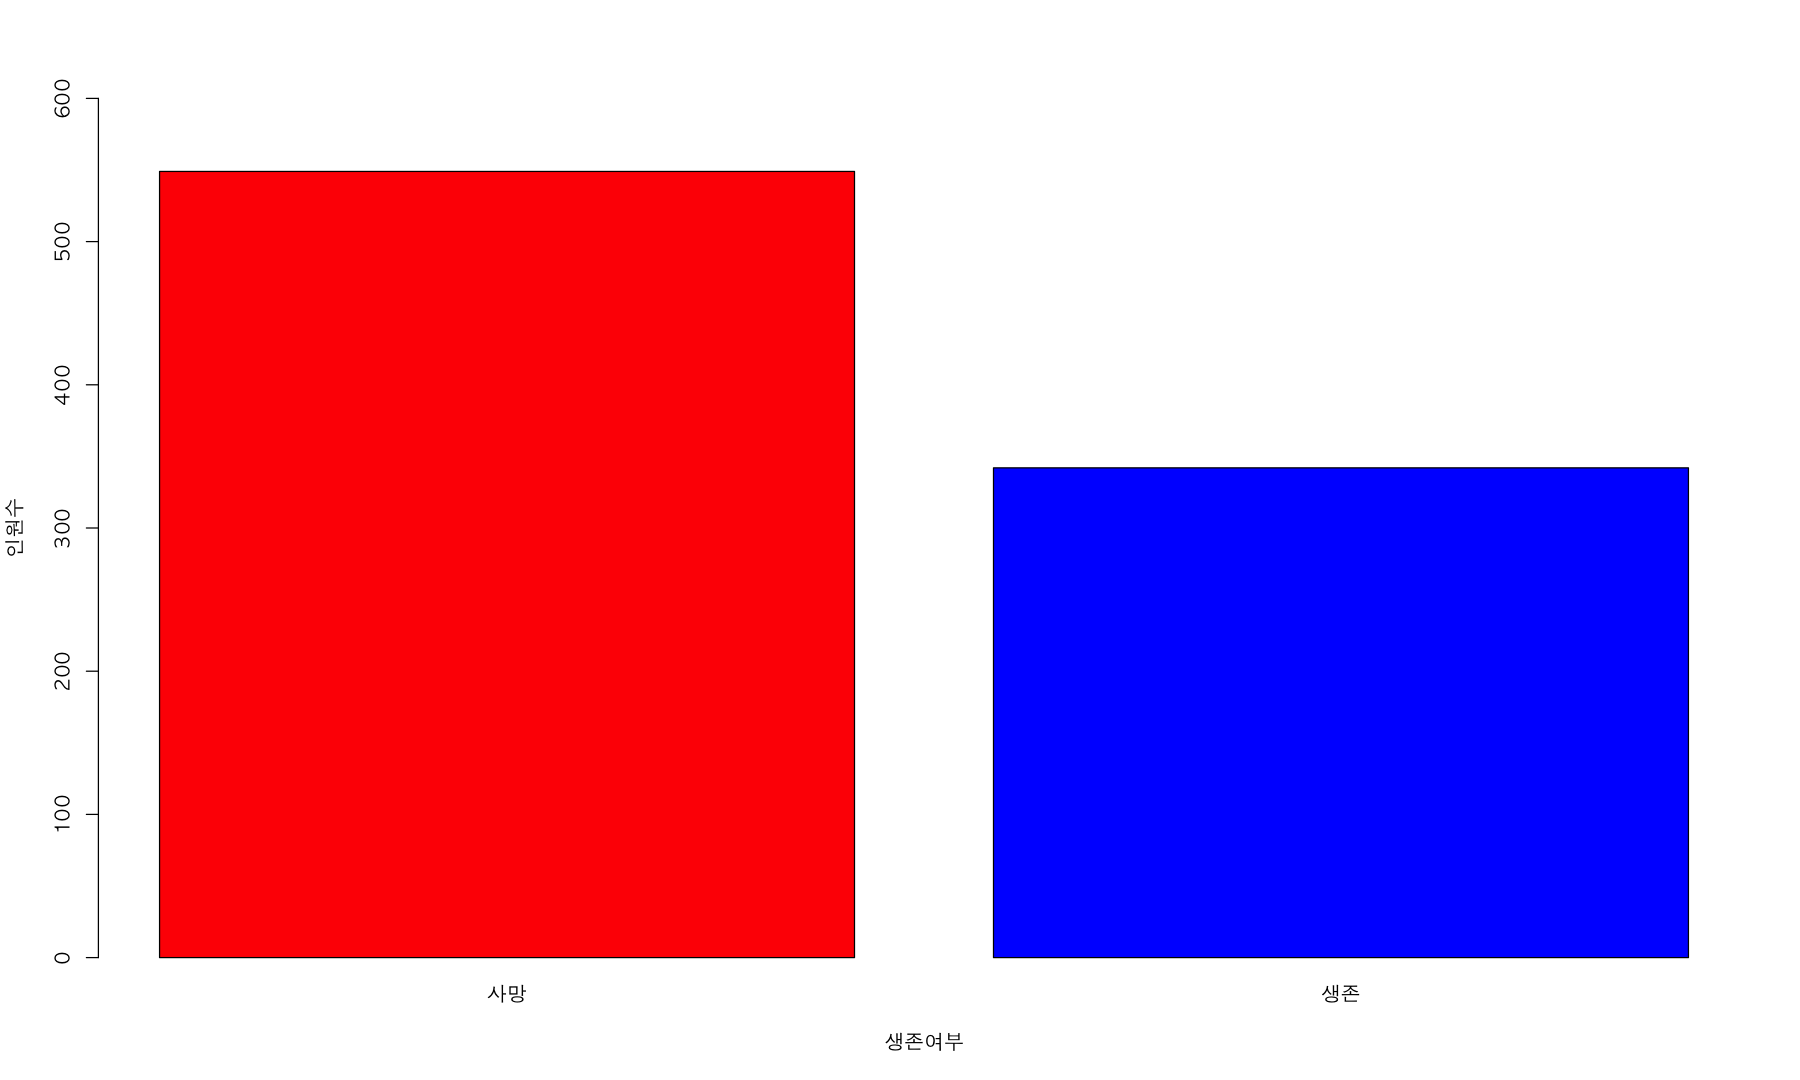

In [67]:
library(plotrix)
par(bg='white',family = "AppleGothic")
pie3D(c(b,a),
      labels = c(paste("생존","\n",round(b,2),'%'),
                 paste("사망","\n", round(a, 2), "%")),
      explode = 0.1,
      main = "타이타닉호 생존 비율",
      col = c("green", "red"))

barplot(df$Count,ylim=c(0,600),ylab="인원수",xlab="생존여부",col=c('red','blue'),names=df$Category)      


In [68]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] "male"   "female"

In [88]:
#여성의 인원과 남성의 인원 확인
nrow(train_df[train_df$Sex=="male",])
nrow(train_df[train_df$Sex=="female",])

a <- nrow(train_df[train_df$Sex=="male"&train_df$Survived==0,])/nrow(train_df[train_df$Sex=="male",])*100
b <- nrow(train_df[train_df$Sex=="male"&train_df$Survived==1,])/nrow(train_df[train_df$Sex=="male",])*100
df <- data.frame(Category = c("사망", "생존"),
                 Count = c(a,b))
                 df


nrow(train_df[train_df$Sex=="female"&train_df$Survived==0,])/nrow(train_df[train_df$Sex=="female",])*100
nrow(train_df[train_df$Sex=="female"&train_df$Survived==1,])/nrow(train_df[train_df$Sex=="female",])*100

[1] 577

[1] 314

Category,Count
<chr>,<dbl>
사망,81.10919
생존,18.89081


[1] 25.79618

[1] 74.20382

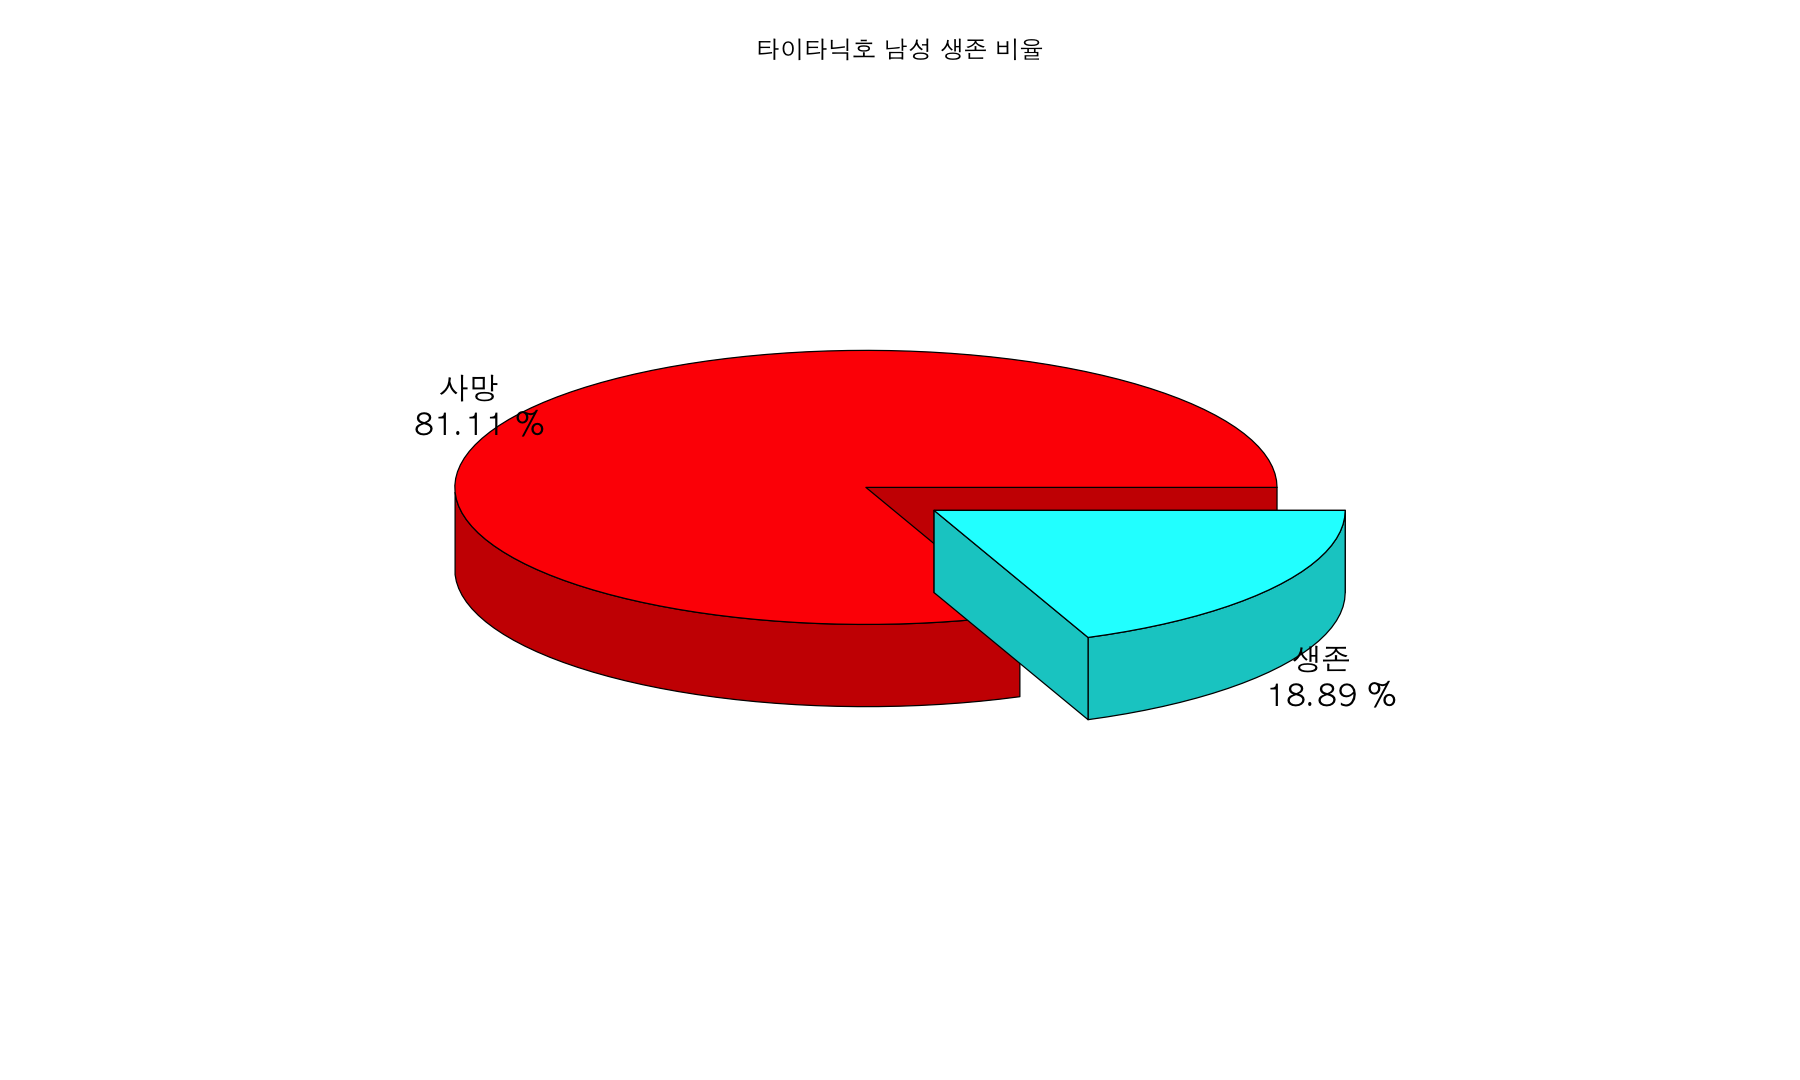

In [89]:
library(plotrix)
par(bg='white',family = "AppleGothic")
pie3D(c(a,b),
      labels = c(paste("사망","\n",round(a,2),'%'),
                 paste("생존","\n", round(b, 2), "%")),
      explode = 0.1,
      main = "타이타닉호 남성 생존 비율",
      col = c('red','cyan'))

      

[1] 577

[1] 314

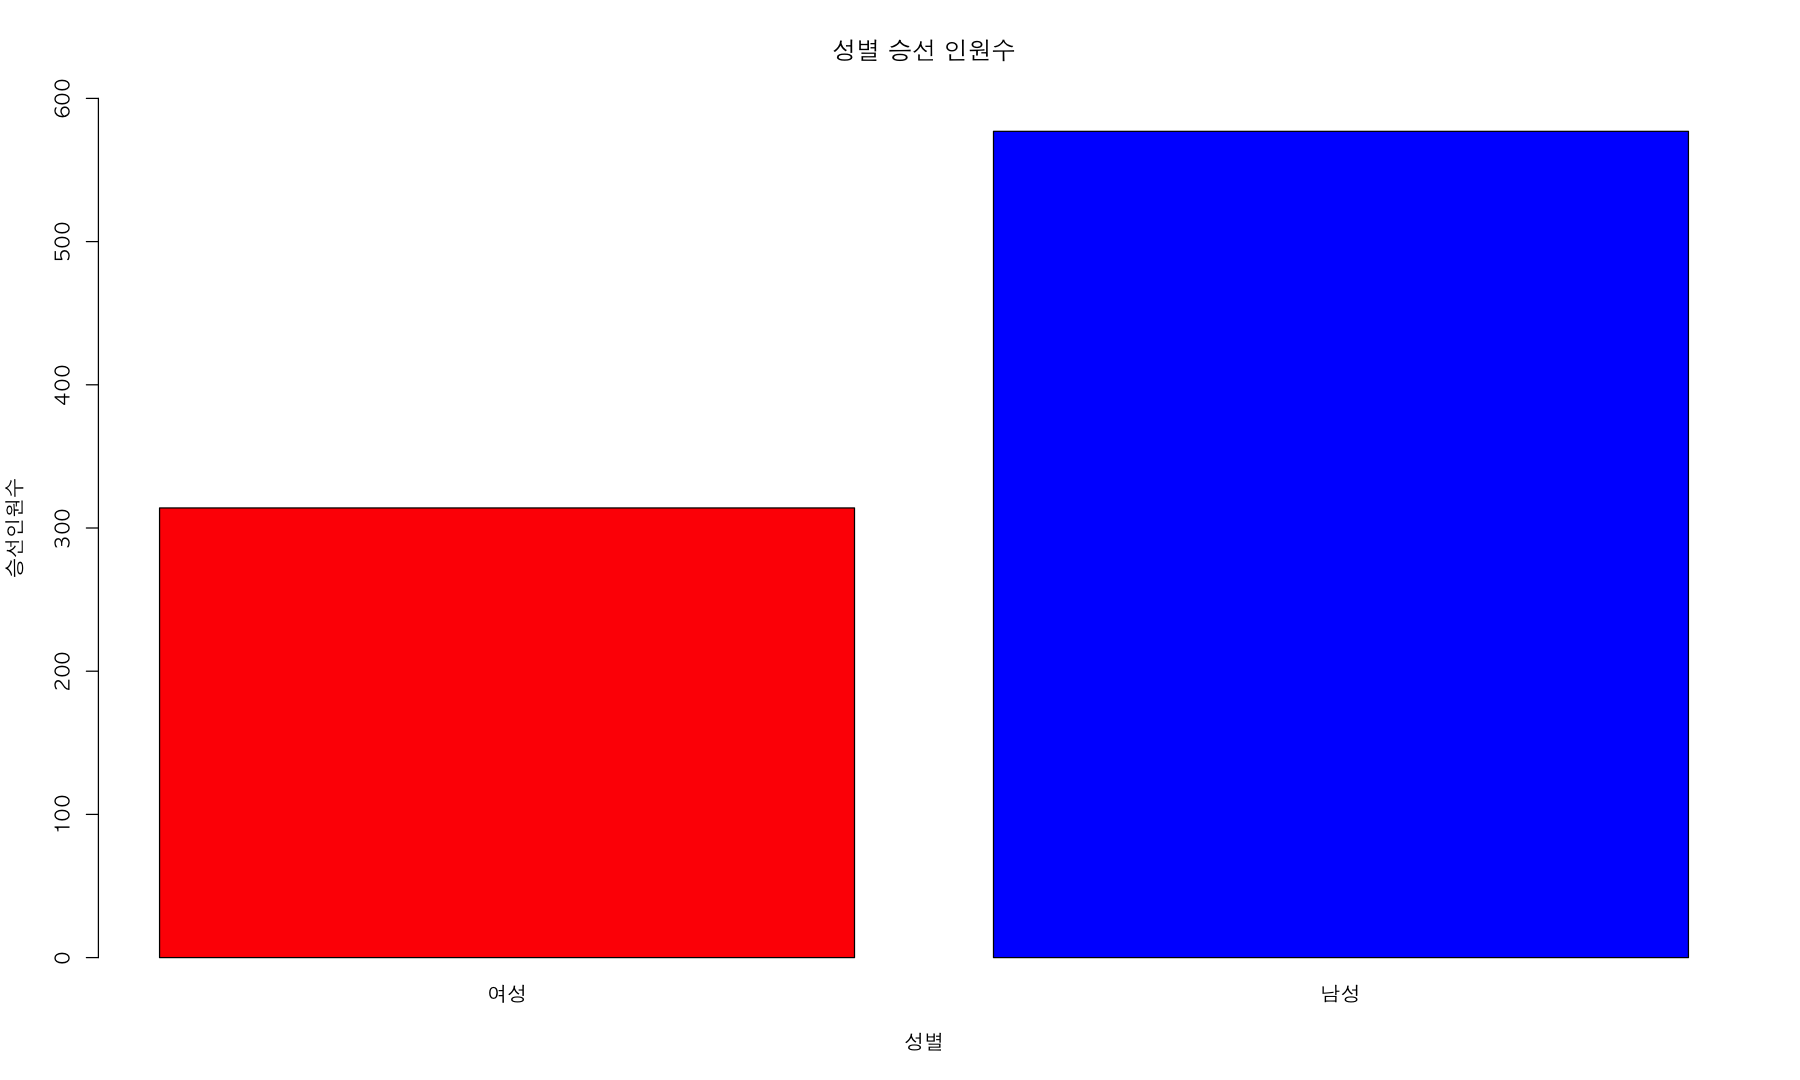

In [97]:
nrow(train_df[train_df$Sex=="male",])
nrow(train_df[train_df$Sex=="female",])

df <- data.frame(Category = c("여성", "남성"),
                 Count = c(nrow(train_df[train_df$Sex=="female",]),nrow(train_df[train_df$Sex=="male",])))

par(bg='white',family = "AppleGothic")
barplot(df$Count,ylim=c(0,600),ylab="승선인원수",xlab="성별",col=c('red','blue'),names=df$Category,main="성별 승선 인원수")      


In [98]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [110]:
#1등 객실의 여성생존율
a <- nrow(train_df[train_df$Sex=="female"&train_df$Survived==1&train_df$Pclass==1,])
b<- nrow(train_df[train_df$Pclass==1&train_df$Sex=="female",])
c<- nrow(train_df[train_df$Sex=="female"&train_df$Survived==1&train_df$Pclass==1,])/nrow(train_df[train_df$Pclass==1&train_df$Sex=="female",])*100

cat("1등 객실의 여성 생존율은 ",a,"/",b,",",round(c,2),"%")

1등 객실의 여성 생존율은  91 / 94 , 96.81 %

In [165]:

d <- nrow(table(train_df$Pclass))
female_survival_rates <- numeric()
male_survival_rates <- numeric()
for (i in 1:2) {
  if (i == 1) {
    gender <- "여성"
  } else {
    gender <- "남성"
  }
  
  
  for (j in 1:d) {
    a <- nrow(train_df[train_df$Sex == ifelse(i == 1, "female", "male") & train_df$Survived == 1 & train_df$Pclass == j,])
    b <- nrow(train_df[train_df$Pclass == j & train_df$Sex == ifelse(i == 1, "female", "male"),])
    c <- a / b * 100
    if (i == 1) {
      female_survival_rates <- append(female_survival_rates, round(c, 2))
    } else {
      male_survival_rates <- append(male_survival_rates, round(c, 2))
    }
    
    cat(j, "등 객실의", gender, "생존율은", a, "/", b, ",", round(c, 2), "%\n")
  }
  
  cat("---------------------\n")
}
female_survival_rates[1]
  df_femail1 <- data.frame(Category = character(), Count = numeric())
for (i in 1:d) {
  df_femail <- data.frame(Category = paste(i, "객실 (여)"),
                          Count = female_survival_rates[i])


  df_femail1 <- rbind(df_femail1, df_femail)
  
}
df_femail1
df_mail1 <- data.frame(Category = character(), Count = numeric())
for (i in 1:d) {
  df_mail <- data.frame(Category = paste(i, "객실 (남)"),
                          Count = male_survival_rates[i])


  df_mail1 <- rbind(df_mail1, df_mail)
  
}
df_mail1

aa <- rbind(df_femail1,df_mail1)
aa

1 등 객실의 여성 생존율은 91 / 94 , 96.81 %
2 등 객실의 여성 생존율은 70 / 76 , 92.11 %
3 등 객실의 여성 생존율은 72 / 144 , 50 %
---------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 %
2 등 객실의 남성 생존율은 17 / 108 , 15.74 %
3 등 객실의 남성 생존율은 47 / 347 , 13.54 %
---------------------


[1] 96.81

Category,Count
<chr>,<dbl>
1 객실 (여),96.81
2 객실 (여),92.11
3 객실 (여),50.00


Category,Count
<chr>,<dbl>
1 객실 (남),36.89
2 객실 (남),15.74
3 객실 (남),13.54


Category,Count
<chr>,<dbl>
1 객실 (여),96.81
2 객실 (여),92.11
3 객실 (여),50.00
1 객실 (남),36.89
2 객실 (남),15.74
3 객실 (남),13.54


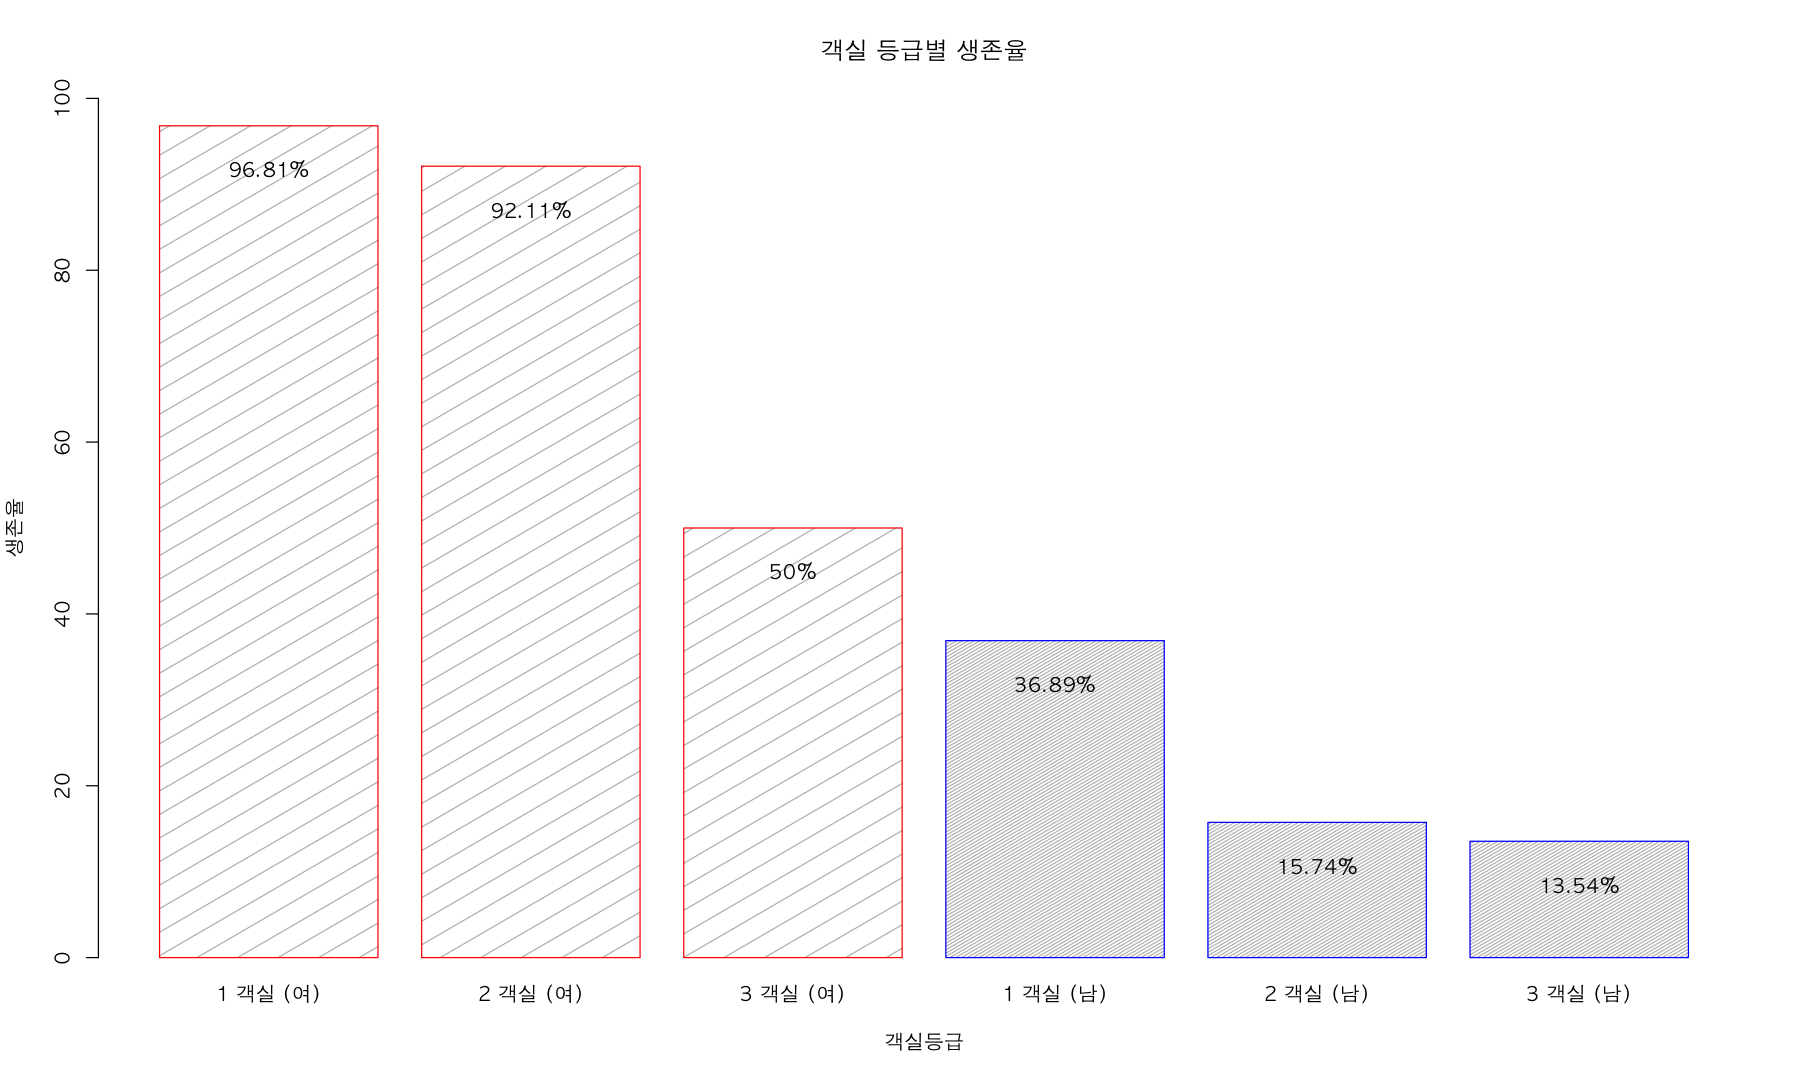

In [208]:

par(bg='white',family = "AppleGothic")
barplot(aa$Count,ylim=c(0,100),names=aa$Category,ylab="생존율",xlab="객실등급",main="객실 등급별 생존율",density =c(10,10,10,70,70,70),
border = c(rep('red',3),rep('blue',3)))
for (i in 1:length(aa$Category)) {
  text(0.7 + 1.2 * (i - 1),aa$Count[i]-5, paste0(aa$Count[i] ,"%"))
}

In [209]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [211]:
subset(train_df,Embarked=="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [216]:
# 복사본 만들기
train_df_T <-train_df
subset(train_df_T,Embarked=="")

# 항구별 탑승인원수 구해 가장많은 탑승인원의 항구로 결정
nrow(train_df[train_df$Embarked=="S",])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


[1] 644

In [218]:
train_df_T$Embarked <- ifelse(train_df$Embarked=="",'S',train_df_T$Embarked) ##전체재분배
subset(train_df_T,Embarked=="")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>


In [219]:
train_df_T <-train_df

In [222]:
train_df_T[train_df_T$Embarked=="",]$Embarked <-'S' ##빈것들만 재분배

ERROR: Error in `$<-.data.frame`(`*tmp*`, Embarked, value = "S"): replacement has 1 row, data has 0


In [262]:

table(train_df$Sex,train_df$Embarked)

a <- table(train_df$Survived,train_df$Embarked)

rownames(a) <- c("death","survive")
a

table(train_df$Pclass,train_df$Embarked)

        
           C   Q   S
  female  73  36 205
  male    95  41 441

         
            C   Q   S
  death    75  47 427
  survive  93  30 219

   
      C   Q   S
  1  85   2 129
  2  17   3 164
  3  66  72 353

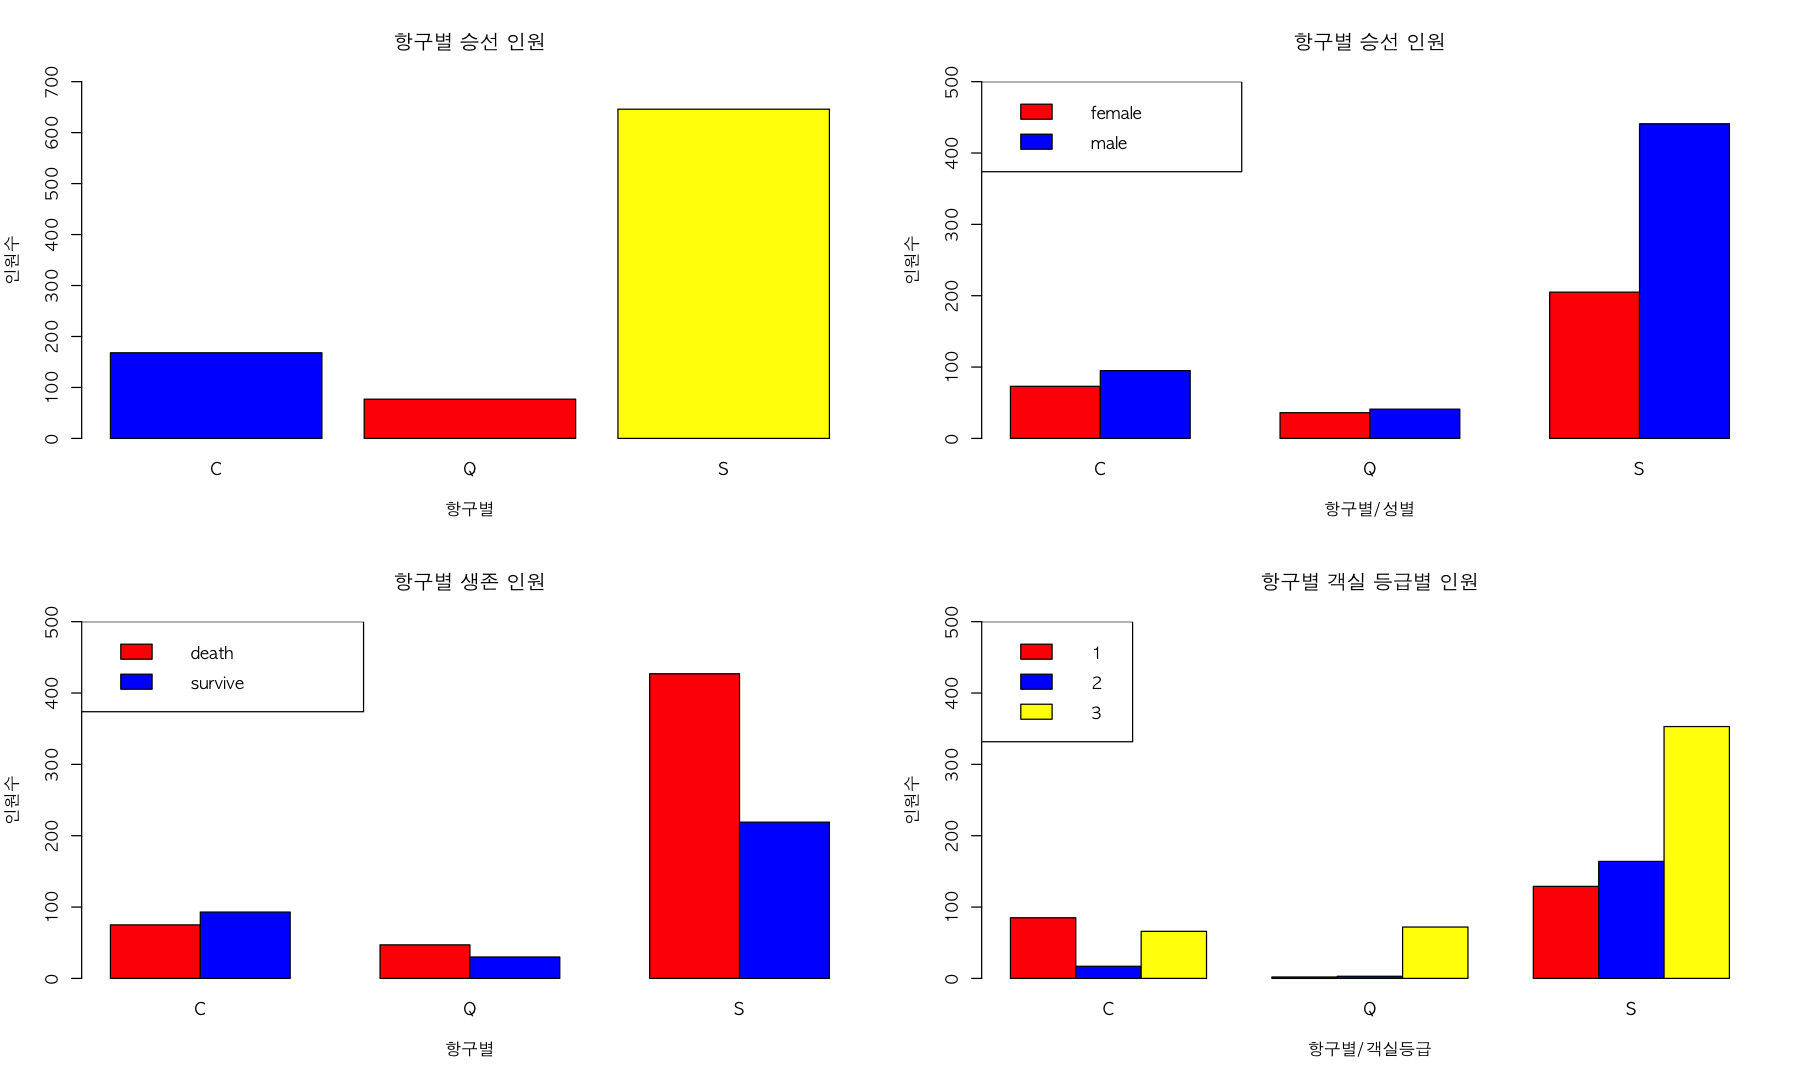

In [266]:
par(bg='white',family = "AppleGothic")
par(mfrow=c(2,2))
barplot(table(train_df$Embarked),ylim=c(0,700),ylab="인원수",xlab="항구별",main="항구별 승선 인원",
    col=c('blue','red','yellow')
)
barplot(table(train_df$Sex ,train_df$Embarked),ylim=c(0,500),ylab="인원수",xlab="항구별/성별",main="항구별 승선 인원",
    col = rep(c('red', 'blue'),3),beside=T
)
legend(x = "topleft", legend = rownames(table(train_df$Sex,train_df$Embarked)), fill = c("red", "blue"))

barplot(a,ylim=c(0,500),ylab="인원수",xlab="항구별",main="항구별 생존 인원",
    col = rep(c('red', 'blue'),3),beside=T
)
legend(x = "topleft", legend = rownames(a), fill = c("red", "blue"))

barplot(table(train_df$Pclass,train_df$Embarked),ylim=c(0,500),ylab="인원수",xlab="항구별/객실등급",main="항구별 객실 등급별 인원",
    col = rep(c('red', 'blue','yellow'),3),beside=T
)
legend(x = "topleft", legend = rownames(table(train_df$Pclass,train_df$Embarked)), fill = c("red", "blue",'yellow'))

절반 이상의 승객이 Southampton에서 배를 탔으며 여기서 탑승한 승객의 70%가 남성이었으며
남성의 사망율이 여성보다 훨씬 높았으므로 Southampton의 사망율이 높게 나왔으며
Southampton에서 탑승한 승객의 60%이상이 3등급 객실을 사용했다
Chersbourg에서 탑승한 승객들은 1등 객실 비중 및 생존율이 높은 것으로 보아 이동네는 부자동네다

In [273]:
abs(cor(train_df$Survived,train_df$Pclass))
cor(train_df$Survived,train_df$Age)

[1] 0.338481

[1] NA

In [271]:
train_df_T <-train_df
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

,Survived,Sex,Pclass,Embarked
,<int>,<chr>,<int>,<chr>
1,0,male,3,S
2,1,female,1,C
3,1,female,3,S
4,1,female,1,S
5,0,male,3,S
6,0,male,3,Q
